#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Clustering with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

In [3]:
df = pd.read_csv(url + 'iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


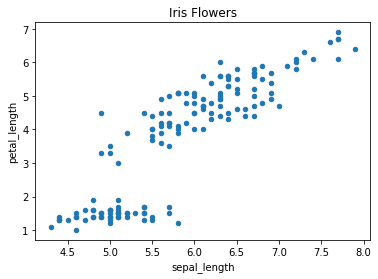

In [5]:
df.plot.scatter(x='sepal_length', y='petal_length', title='Iris Flowers');

In [6]:
X = df.drop('species', axis=1).values

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
centers = model.cluster_centers_
centers

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

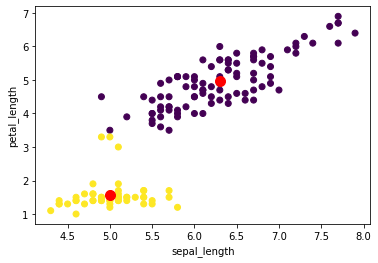

In [10]:
plt.scatter(df['sepal_length'], df['petal_length'], c=model.labels_)
plt.scatter(centers[:, 0], centers[:, 2], marker='o', c='r', s=100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length');

### Exercise 1

What is the optimal number of clusters in this dataset? One way to find it is to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) that plots the sum of square distances from the nearest cluster center as a function of the number of clusters. We call this quantity "inertia". As the number of cluster increases, the total inertia will decrease as there will be more cluster centers and therefore each point will be closer to one such center. At some point, however, adding more centers will result in diminishing returns.

- Iterate over `k` from 1 to 10
- for each `k` fit a `KMeans` model to the data
- Plot the `model.inertia_` as a function of `k`

The ideal number of clusters is found at the "Elbow" of the curve.

In [11]:

ks = range(1, 10)
evs = []

for k in ks:
  model = KMeans(k)
  model.fit(X)
  score = model.inertia_
  evs.append(score)

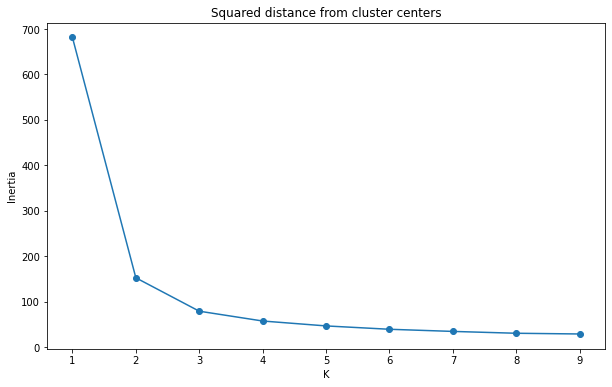

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(ks, evs, 'o-')
plt.title("Squared distance from cluster centers")
plt.xlabel("K")
plt.ylabel("Inertia");


### Exercise 2
A different method to assess the goodness of a clustering in absence of labels is the [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)).

Let's explore how the `silhouette_score` changes as a function of `k`.

- Iterate over `k` from 2 to 10
- for each `k` fit a `KMeans` model to the data
- evaluate the results with the `silhouette_score`

- Bonus points if you plot the score as a function of `k`
- Bonus points if you plot the clusters for each value of `k`. To accomplish this task you could define a helper function:
```python
def plot_clusters(model, centers=None):
  # YOUR CODE HERE
```
that uses the plotting code from the previous cell.

In [13]:
from sklearn.metrics import silhouette_score

In [14]:

def plot_clusters(model, centers=None):
  plt.scatter(df['sepal_length'], df['petal_length'], c=model.labels_)

  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 2], marker='o', c='r', s=100)
  
  plt.xlabel('sepal_length')
  plt.ylabel('petal_length');

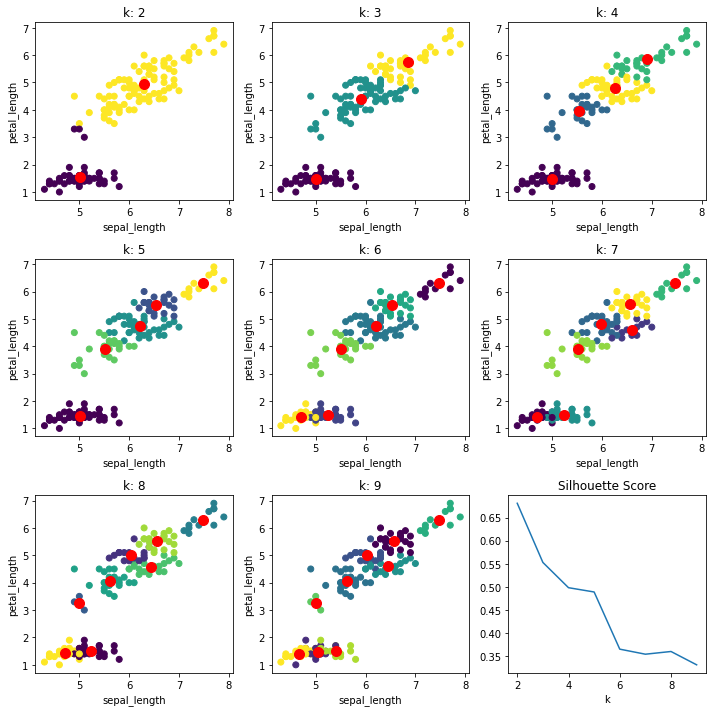

In [15]:
ks = range(2, 10)
ss = []
i = 1
plt.figure(figsize=(10, 10))

for k in ks:
  model = KMeans(k)
  model.fit(X)
  score = silhouette_score(X, model.labels_)
  ss.append(score)

  plt.subplot(3, 3, i)
  plot_clusters(model, model.cluster_centers_)
  plt.title("k: {}".format(k))
  
  i = i+1


plt.subplot(3, 3, i)
plt.plot(ks, ss)
plt.title("Silhouette Score")
plt.xlabel("k")

plt.tight_layout()

### Exercise 3

- Switch clustering method to `DBSCAN` and fit the model for various values of `eps`
- calculate the `silhouette_score` for each value
- determine how many clusters were found for each value
- Bonus points if you plot the `silhouette_score` as a function of `eps`

In [16]:
from sklearn.cluster import DBSCAN

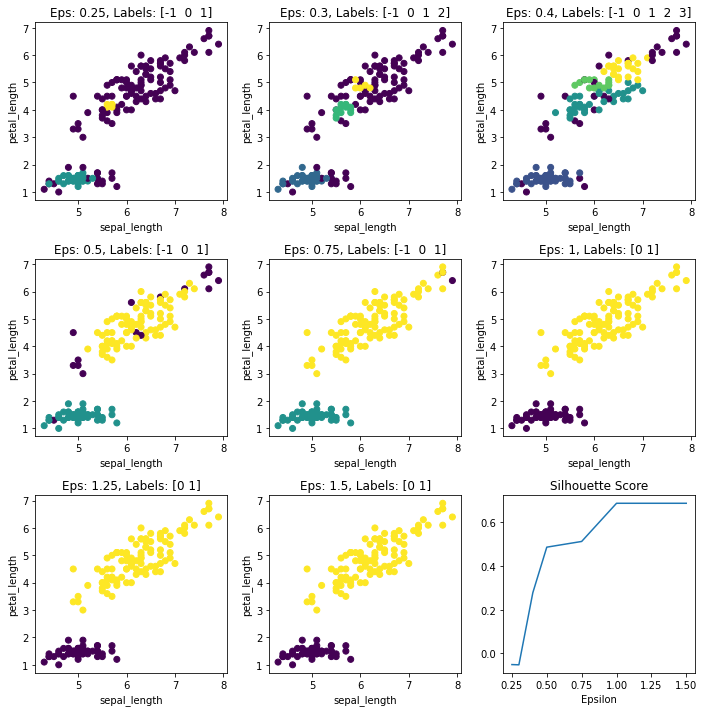

In [17]:

epss = [0.25, 0.3, 0.4, 0.5, 0.75, 1, 1.25, 1.5]
ss = []
i = 1

plt.figure(figsize=(10, 10))

for eps in epss:
  model = DBSCAN(eps=eps)
  model.fit(X)
  score = silhouette_score(X, model.labels_)
  ss.append(score)

  plt.subplot(3, 3, i)
  plot_clusters(model)
  plt.title("Eps: {}, Labels: {}".format(eps, np.unique(model.labels_)))
  
  i = i+1


plt.subplot(3, 3, i)
plt.plot(epss, ss)
plt.title("Silhouette Score")
plt.xlabel("Epsilon")

plt.tight_layout()